<a href="https://colab.research.google.com/github/andizadry/Inshort-News-NLP-using-Tensorflow/blob/main/Andi_Sadri_Agung_Membuat_Model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Submission Belajar Pengembangan Machine Learning**
##**Proyek Pertama : Membuat Model NLP dengan TensorFlow**
Nama : Andi Sadri Agung

Domisili : Makassar, Sulawesi Selatan

Surel : andisadriagung20@gmail.com

Beasiswa : Lintasarta Cloudeka Digischool 2023 (Intermediate)
Dataset : https://www.kaggle.com/datasets/kishanyadav/inshort-news/versions/2?resource=download

In [ ]:
!unzip inshort_news_data-1.csv.zip

Archive:  inshort_news_data-1.csv.zip
  inflating: inshort_news_data-1.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('inshort_news_data-1.csv')
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4817 non-null   int64 
 1   news_headline  4817 non-null   object
 2   news_article   4817 non-null   object
 3   news_category  4817 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.7+ KB


In [ ]:
labels = pd.get_dummies(df.news_category)

In [ ]:
df_clean = pd.concat([df, labels], axis=1)
df_clean = df_clean.drop(columns='news_category')
df_clean

,Unnamed: 0,news_headline,news_article,automobile,entertainment,politics,science,sports,technology,world
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",0,0,0,1,0,0,0
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,0,0,0,1,0,0,0
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,0,0,0,1,0,0,0
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,0,0,0,1,0,0,0


In [ ]:
news_article = df_clean['news_article'].values
news_class = df_clean[['automobile', 'entertainment', 'politics', 'science', 'sports','technology','world' ]].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(news_article, news_class, test_size = 0.2 )

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(sequences_train)
padded_test = pad_sequences(sequences_test)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 119623 (467.28 KB)
Trainable params: 11962

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') and logs.get('val_accuracy') > 0.92:
            print('\nAchieved 92% Accuracy on Validation Data!')
            self.model.stop_training = True

custom_callback = CustomCallback()
history = model.fit(
    padded_train, y_train,
    epochs=50,
    validation_data=(padded_test, y_test),
    verbose=2,
    callbacks=[custom_callback]
)

Epoch 1/50
121/121 - 16s - loss: 1.7358 - accuracy: 0.2730 - val_loss: 1.3783 - val_accuracy: 0.4523 - 16s/epoch - 130ms/step
Epoch 2/50
121/121 - 5s - loss: 1.0811 - accuracy: 0.5819 - val_loss: 0.9118 - val_accuracy: 0.6473 - 5s/epoch - 44ms/step
Epoch 3/50
121/121 - 5s - loss: 0.7236 - accuracy: 0.7355 - val_loss: 0.6903 - val_accuracy: 0.7541 - 5s/epoch - 39ms/step
Epoch 4/50
121/121 - 5s - loss: 0.4656 - accuracy: 0.8440 - val_loss: 0.7205 - val_accuracy: 0.7739 - 5s/epoch - 45ms/step
Epoch 5/50
121/121 - 5s - loss: 0.3021 - accuracy: 0.9086 - val_loss: 0.3794 - val_accuracy: 0.8994 - 5s/epoch - 42ms/step
Epoch 6/50
121/121 - 5s - loss: 0.2134 - accuracy: 0.9372 - val_loss: 0.4294 - val_accuracy: 0.8776 - 5s/epoch - 37ms/step
Epoch 7/50
121/121 - 6s - loss: 0.1767 - accuracy: 0.9476 - val_loss: 0.4236 - val_accuracy: 0.8932 - 6s/epoch - 47ms/step
Epoch 8/50
121/121 - 5s - loss: 0.1545 - accuracy: 0.9494 - val_loss: 0.3522 - val_accuracy: 0.9004 - 5s/epoch - 39ms/step
Epoch 9/50
12

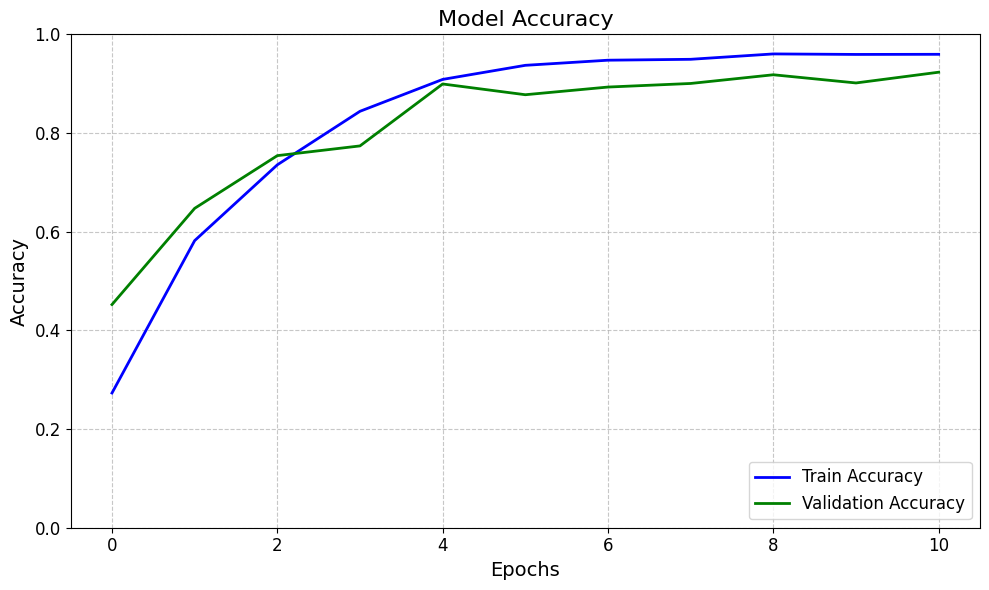

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', linewidth=2)
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

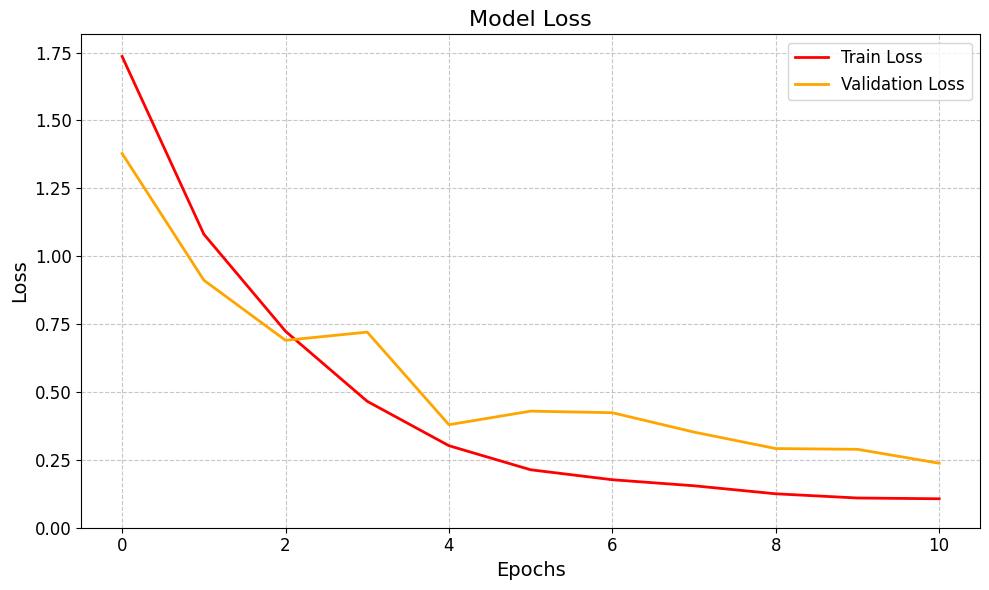

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()